In [1]:
pip install pillow 

Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.display import Image

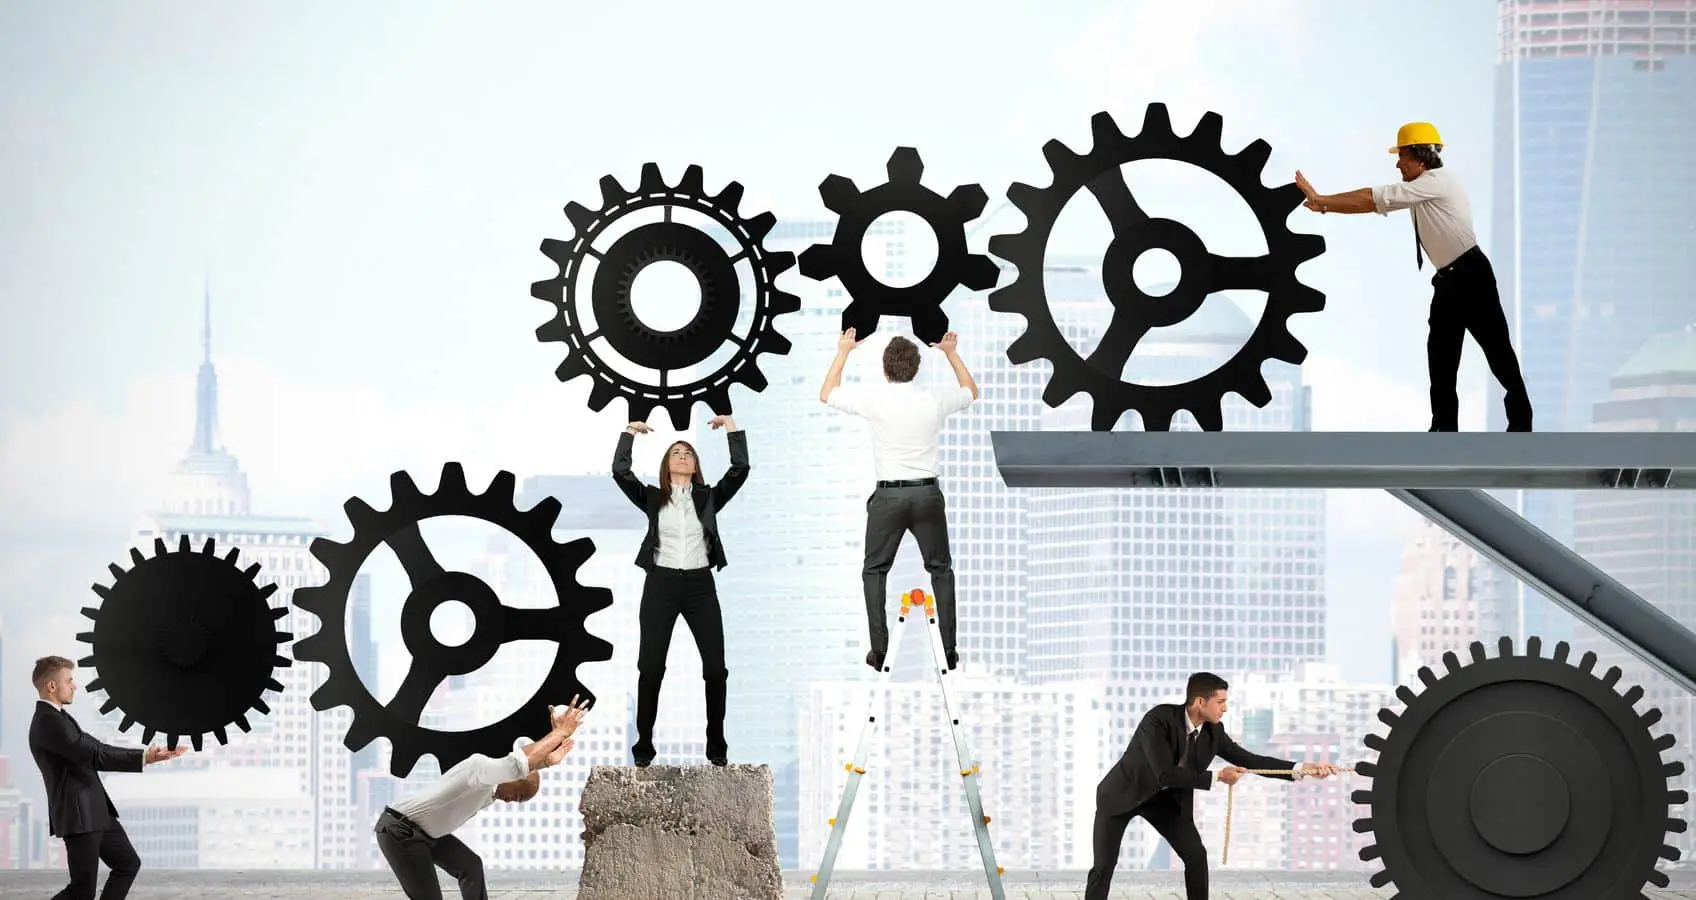

In [3]:
Image ("Images/the-employee-performance-continuum.jpg" , width=1000, height=600)

# Employee Performance Analysis

**Author: Sneha Bhaskar**

**Date**: 10 October 2023 

___________________________________________________

# Overview 

# Business & Goal of this project

In today's competitive business landscape, employee performance plays a pivotal role in a company's success. Organizations need to understand the factors influencing employee performance to optimize workforce strategies, foster employee growth, and maintain a competitive edge. For the company in question, having a comprehensive and data-driven understanding of the performance determinants can enable effective HR decisions, from recruitment strategies to tailored training programs.

**Project Goal:**
- The primary objective of this project is to derive actionable insights from the Employee dataset to understand the critical factors affecting employee performance ratings. By leveraging data analytic skills, the company aims to predict performance ratings with high accuracy and pinpoint the most influential features. The insights obtained will serve as a foundation for data-driven decision-making in HR strategies, leading to improved employee performance and, by extension, organizational growth.

The data was taken from https://www.analyticsvidhya.com/blog/2023/05/10-best-data-analytics-projects/#h-employee-performance-analysis


#### Import standard packages

In [4]:
import pandas as pd #data manipulation and analysis. Can create data frames, filter data, group by attributes, etc. 
import numpy as np #numerical python library for array manipulation, math functions etc.
import seaborn as sns #data visualization library based on Matplotlib, with higher-level functions ad nicer default styles. 

import matplotlib.pyplot as plt #2D plotting lib.
plt.style.use("ggplot") #changes the default style of Matplotlib plots to ggplot.

from statsmodels.formula.api import ols #ordinary least square (OLS) is a regression model aiming to minimise the sum of squared differences between observed and predicted values.
import statsmodels.api as sm #statsmodel includes various statistical tests, models and functions. 
from statsmodels.stats.outliers_influence import variance_inflation_factor #a measure to detect multicollinearity in regression moedels.
import scipy.stats as stats #statistical functions from the SciPy lib, which builds on NumPy. This lib also provides a large number of probability distribution, statistical functions and test for statistical analysis. 
from sklearn.linear_model import LinearRegression  #linear model
from sklearn.model_selection import train_test_split #function for splitting datasets into training and testing sets. 
from sklearn.metrics import mean_squared_error #function for computing the mean squarred error, a meausure of the average of the sqaures of the errors.
from sklearn.preprocessing import OneHotEncoder #preprocessing technique to convert categorical variables to a format that can be provided to machine learning algorithms to improve prediction 
from sklearn.model_selection import cross_val_score #function for evaluating a model using cross-validation 
from sklearn.model_selection import KFold #K-Fold cross validator
from itertools import combinations #itertools is used for generating all possible combination of the given list.

Applying the OSEMN framework to an employee performance dataset can help to analyze and understand employee performance, and potentially improve it.



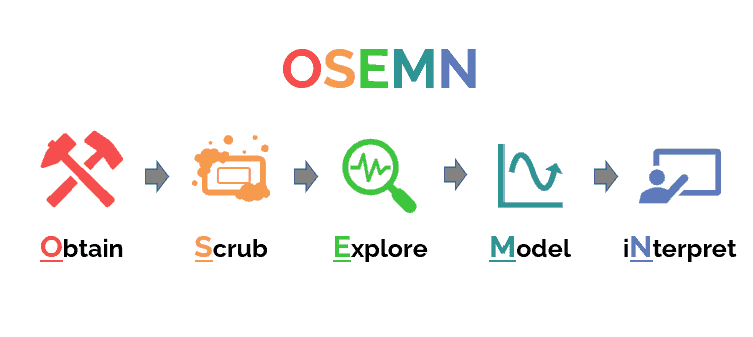

In [84]:
Image ("Images/osemn-2.png" , width=1000, height=600)

# Employee Performance Dataset

### OBTAIN

<font color='red' >This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data we think will be necessary for solving this problem  </font>

In [6]:
df = pd.read_csv ('Data/Employee_Performance_Data.csv')
df

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

In [7]:
print("The number of rows is",df.shape[0])
print('The number of columns is',df.shape[1])

The number of rows is 1200
The number of columns is 28


**The given Employee dataset consist of 1200 rows. The features present in the data are 28 columns. The shape of the dataset is 1200x28. The 28 features are classified into quantitative and qualitative where 19 features are quantitative (11 columns consists numeric data & 8 columns consists ordinal data) and 8 features are qualitative. EmpNumber consist alphanumerical data (distinct values) which doesn't play a role as a relevant feature for performance rating.**

### SCRUB 

<font color='red' >This step focuses on cleaning the data, which involves handling missing values, removing outliers, and converting data types and many more. Data cleaning is crucial because the quality of data affects the quality of the final model produced</font>

BASIC CHECKS OF DATA

In [8]:
#check for duplicates
df.duplicated(keep = False).sum()

0

In [9]:
#checking columns
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

___________________________________________

### Differentiate into Categorical, Numerical and Ordinal - More information can be found in Metadata Prodivided in Data Folder 
**Categorical Features**
- EmpNumber
- Gender
- EducationBackground
- MaritalStatus
- EmpDepartment
- EmpJobRole
- BusinessTravelFrequency
- OverTime
- Attrition

**Numerical Features**
- Age
- DistanceFromHome
- EmpHourlyRate
- NumCompaniesWorked
- EmpLastSalaryHikePercent
- TotalWorkExperienceInYears
- TrainingTimesLastYear
- ExperienceYearsAtThisCompany
- ExperienceYearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

**Ordinal Features**
- EmpEducationLevel
- EmpEnvironmentSatisfaction
- EmpJobInvolvement
- EmpJobLevel
- EmpJobSatisfaction
- EmpRelationshipSatisfaction
- EmpWorkLifeBalance
- PerformanceRating

_____________________________________________________

In [10]:
df.shape

(1200, 28)

Dataset contain total 28 features with 1 unique feature (EmpNumber) and 1200 observation.

In [11]:
df.info()
#in this data two type of data is available (integer and object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

STATISTICAL MEASURE OF DATA

In [12]:
#numerical features
df.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [13]:
#Categorical 
df.describe(include="O")

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

In [14]:
#check for null values 
df.isna().sum()
#no null values detected

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

### EXPLORE 

<font color='red' > After cleaning the data, I then explore it to understand its structure, trends, and patterns. This typically involves generating descriptive statistics, and visualizing the data using various kinds of plots. The goal is to gain insights that will help you when modeling.  </font>

# Department Wise Performance Rating

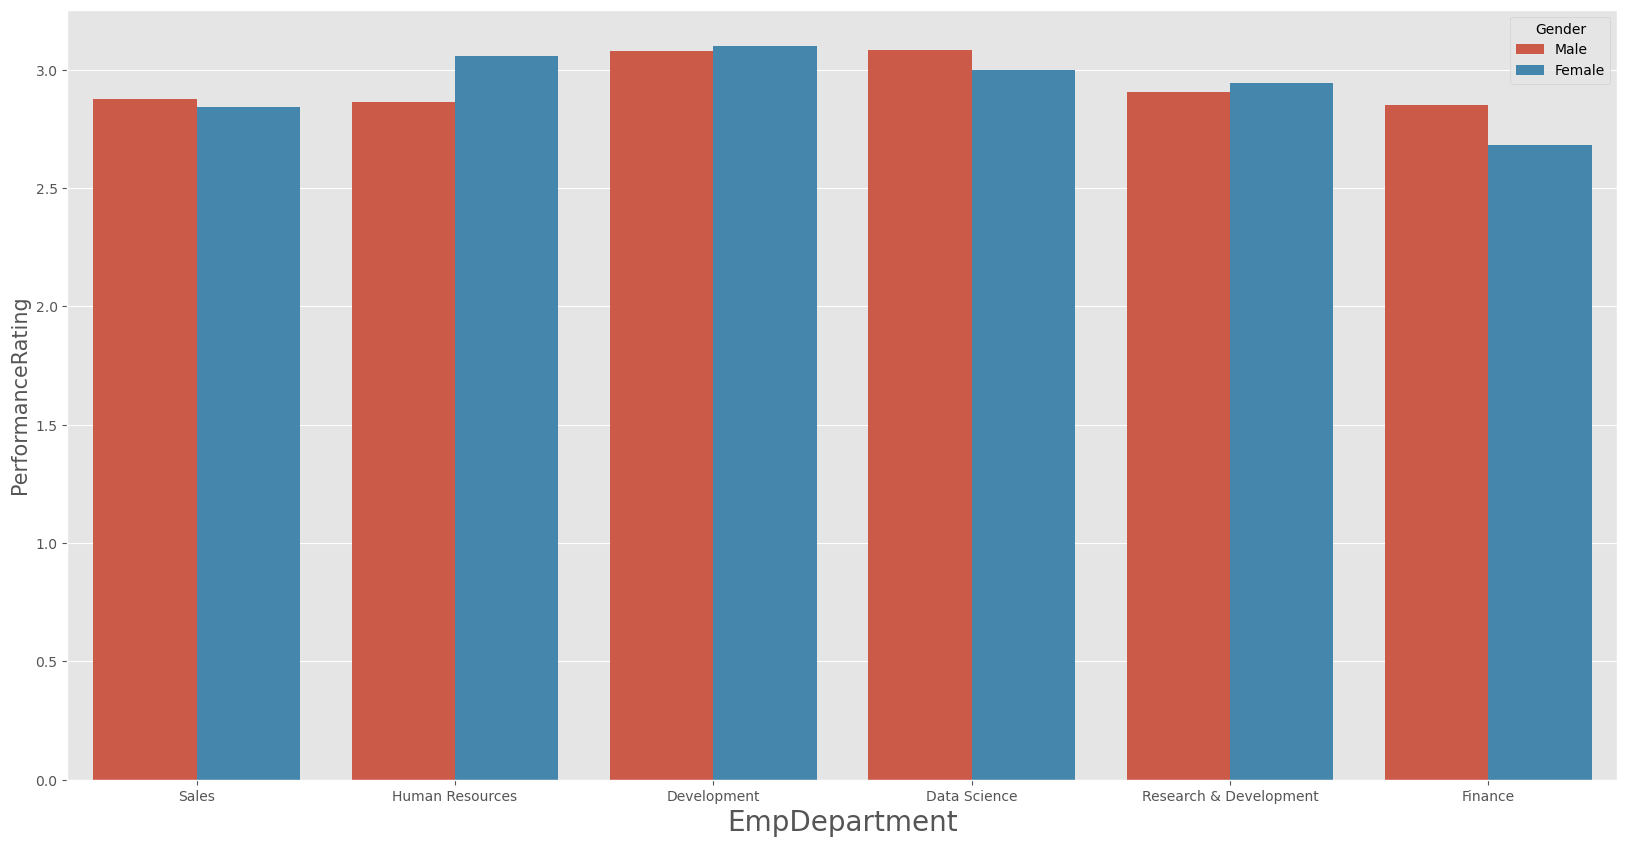

In [15]:
plt.figure(figsize=(20,10), facecolor='white')


sns.barplot(x='EmpDepartment', y='PerformanceRating', hue='Gender', data=df, errorbar= None)

plt.xlabel('EmpDepartment', fontsize=20)
plt.ylabel('PerformanceRating', fontsize=15)
plt.show()

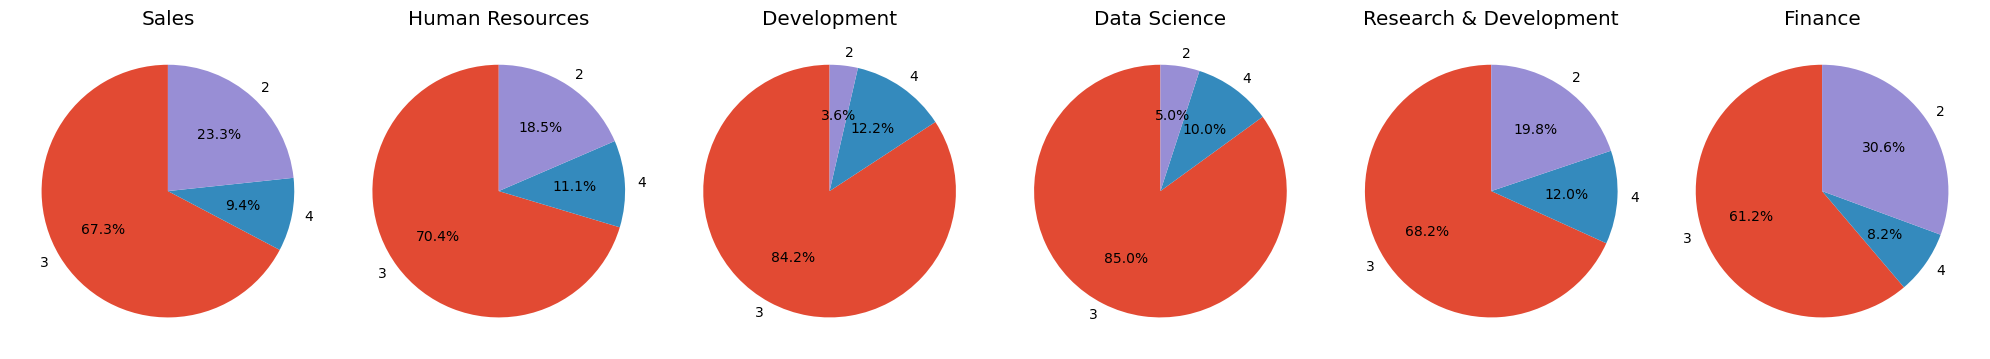

In [16]:
departments = df['EmpDepartment'].unique()
all_ratings = df['PerformanceRating'].unique()

fig, axes = plt.subplots(nrows=1, ncols=len(departments), figsize=(20, 10))

for ax, department in zip(axes, departments):
    filtered_data = df[df['EmpDepartment'] == department]['PerformanceRating']
    value_counts = filtered_data.value_counts().reindex(all_ratings, fill_value=0)
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(department)

plt.tight_layout()
plt.show()

PerformanceRating - Employee's performance rating, ranked 
            
1. Low
2. Good
3. **Excellent** - All the departments have almost 60-80% excellance employee performance rate 
4. Outstanding

### At a Glance: How Departments Are Performing

**Sales:** In the sales world, most employees are hitting the mark with a performance rating of 3. Men have a slight edge in their ratings over women.

**Human Resources:** Most HR professionals are rocking a performance level of 3. A special shoutout to older employees in HR; they might be a tad behind in their ratings. But the women in HR? They're shining stars, consistently delivering top-notch work.

**Development:** The majority of folks in Development are consistent performers, scoring a level 3. Age doesn't seem to matter here - young or old, they're all at the top of their game. As for gender, it's a tie; both men and women are equally impressive.

**Data Science:** Now, this is an exciting department! They boast the highest average of level 3 performers. It's noteworthy to mention that there's a smaller bunch of level 2 performers here compared to other departments. And guess what? Men in Data Science are outperforming a bit!

**Research & Development:** Age is just a number in R&D! Employees of various ages can be found at each performance level. A thumbs-up to the women in this department; they're bringing their A-game.

**Finance:** The finance realm offers an interesting insight: as employees age, their performance seems to take a dip. Men seem to be at the forefront in terms of performance. A notable mention: more experienced folks might be facing challenges, as their performance tends to decrease a bit.

# TOP 3 FACTOR AFFECTING TO THE EMPLOYEE PERFORMANCE

**From visualisation file we get the top 3 factor affecting to the employee performance**

- Employee Environment Satisfaction
- Employee Last Salary Hike Percent
- Employee Work Life Balance

In [17]:
df

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

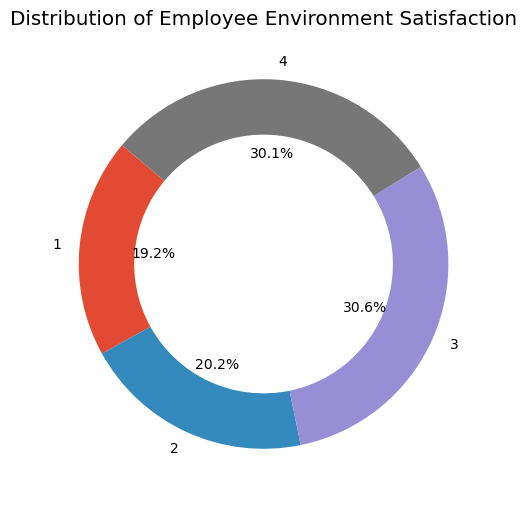

In [18]:
# 1.Employee enviorment Satisfaction
value_counts = df['EmpEnvironmentSatisfaction'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribution of Employee Environment Satisfaction')
plt.show()

### Employee Environment Satisfaction

**Maximum Number of Employees Performance Rating belongs to EmpEnvironmentSatisfaction Level 3 & Level 4**

ranking score means;

1. Low: 19%

Description: Employees who rank their satisfaction as "Low" are generally unhappy or discontent with their working environment. This might be due to a number of reasons such as inadequate facilities, poor ergonomics, excessive noise, lack of cleanliness, or other factors that affect their comfort and ability to work productively.

Implications: Low satisfaction often leads to decreased morale, lower productivity, and potentially higher turnover. It's crucial for management to identify the causes and work towards improving the working conditions.
Medium:

2. Medium: 20.2%

Description: A "Medium" rank indicates that employees find their working environment to be average. They might have certain elements they are happy with, but there might be areas of improvement. They neither feel too discontent nor too pleased.

Implications: Employees who rank their satisfaction as medium might not be urgently looking to leave, but they're not fully engaged either. It's a signal for management that there are areas to be improved, but the situation isn't critical.
High:

3. **High - 30.6%**

Description: Employees who give a "High" rank are generally pleased with their working environment. They find most facilities and conditions to be conducive to work, and they feel comfortable in their workspace. It indicates that the organization is taking good measures to ensure employee comfort.

Implications: High satisfaction levels are linked to better morale, increased productivity, and lower turnover. However, it's always beneficial for management to stay proactive and continue seeking feedback to maintain or even enhance this satisfaction level.
Very High:

4. **Very High - 30.1%**

Description: A "Very High" ranking denotes that employees are extremely satisfied with their working environment. This could mean that not only are the basic needs met, but there are additional perks, amenities, or conditions that enhance their work experience. Such environments might include advanced ergonomic setups, appealing aesthetics, state-of-the-art facilities, and a positive, inclusive culture.

Implications: A very high satisfaction level is indicative of a workplace that truly values and understands the importance of a good working environment. Such organizations likely see higher employee loyalty, increased efficiency, and a stronger organizational culture.

In [19]:
# 2.Employee last salary hike percent
pd.crosstab(df['EmpLastSalaryHikePercent'],df['PerformanceRating'],margins=True)

PerformanceRating           2    3    4   All
EmpLastSalaryHikePercent                     
11                         28  140    1   169
12                         30  123    2   155
13                         27  138    3   168
14                         28  140    4   172
15                         11   67    4    82
16                         12   54    2    68
17                          9   55    3    67
18                         10   63    0    73
19                         10   51    2    63
20                          9   14   27    50
21                          4    6   24    34
22                          7   13   27    47
23                          4    2   15    21
24                          2    5   11    18
25                          3    3    7    13
All                       194  874  132  1200

### Employee Last Salary Hike Percentage

**Employees with Salary Hike Percentage of 11-19%** 

Observation: A majority of employees who received a salary hike in the range of 11-19% have been observed to receive performance ratings of 2 (Good) and 3 (Excellent).

Elaboration: If a company is awarding salary hikes in the range of 11-19%, it could indicate that these employees are delivering consistent performance, but perhaps not exceptionally above and beyond what is expected. This is reflected in the 'Good' and 'Excellent' performance ratings.

Employees with a 'Good' rating might have met their targets and expectations, hence the reasonable hike. Those with an 'Excellent' rating might have slightly exceeded the expectations, justifying a higher percentage in the same range.

The data suggests that employees in this salary hike range have shown considerable merit, but not enough to break into the highest echelons of performance (Outstanding).

**Employees with Salary Hike Percentage of 20-25%**

Observation: Employees who received a salary hike in the range of 20-22% predominantly have a performance rating of 4 (Outstanding).

Elaboration: Such a significant salary hike implies that these employees have demonstrated exceptional performance. Their contributions have had a notable positive impact on the organization, warranting a substantial financial reward.

A performance rating of 'Outstanding' indicates that these employees consistently went above and beyond their job roles, showing innovation, leadership, and a significant impact. They might have achieved and even surpassed high-target goals, introduced transformative ideas, or taken on additional responsibilities.

By giving them such a hike, the company is not only rewarding their stellar performance but also possibly trying to retain these top talents by making them feel valued and recognized.

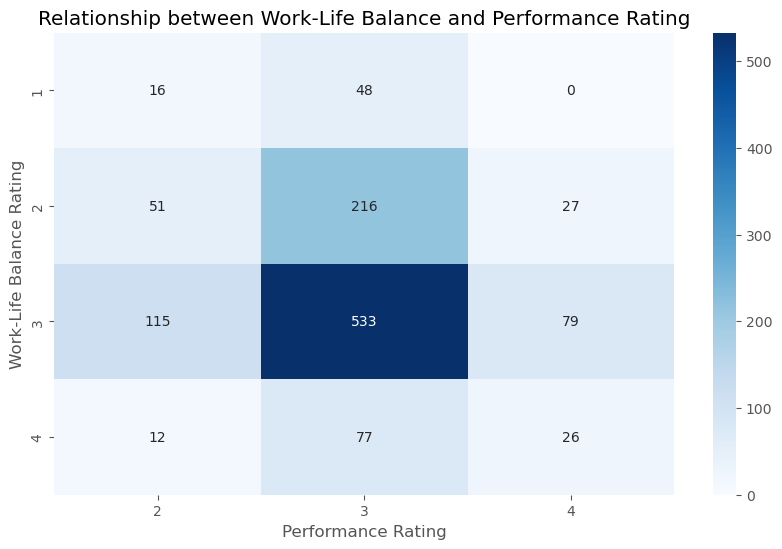

In [20]:
# 3.Employee Work life balance
# Crosstab between EmpWorkLifeBalance and PerformanceRating
ct = pd.crosstab(df['EmpWorkLifeBalance'], df['PerformanceRating'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, cmap='Blues', fmt='g')

# Titles and labels
plt.title('Relationship between Work-Life Balance and Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Work-Life Balance Rating')
plt.show()

**EmpWorkLifeBalance** - Assessment of work-life balance 

ranking;  
1. Bad
2. Good
3. Better
4. Best

Interpretation

This heatmap shows that employees with a 'Better' work-life balance rating (level 3) tend to have excellant performance ratings, this suggests several insights:

Importance of Balance: Employees who perceive their work-life balance as 'Better' tend to perform better. This underscores the importance of fostering a work environment where employees can achieve a satisfactory balance between work and personal life.

Motivation and Productivity: A 'Better' work-life balance might indicate that employees are less stressed, more motivated, and more satisfied with their jobs, leading to higher performance levels.

Comparison with Other Levels: The strength of this relationship becomes even more pronounced if the 'Better' rating's darker squares starkly contrast with those of other ratings. For instance, if employees with a 'Good' or 'Best' work-life balance don't show as strong a pattern with performance, it might indicate that there's something unique about the conditions or perceptions of the 'Better' group.

# CHECKING THE DISTRIBUTION OF CONTINUOUS FEATURE

Those feature continuous in nature only use this feature to plot a distribution

In [21]:
# Get the continuous features
df.select_dtypes('int64').head()

Age  DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0   32                10                  3                           4   
1   47                14                  4                           4   
2   40                 5                  4                           4   
3   41                10                  4                           2   
4   60                16                  4                           1   

   EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0             55                  3            2                   4   
1             42                  3            2                   1   
2             48                  2            3                   1   
3             73                  2            5                   4   
4             84                  3            2                   1   

   NumCompaniesWorked  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0                   1                        12                            4   
1                   2                        12                            4   
2                   5                        21                            3   
3                   3                        15                            2   
4                   8                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
0                        0                     8                  3  
1                        1                     7                  3  
2                        1                    12                  4  
3                       12                     6                  3  
4                        2                     2                  3

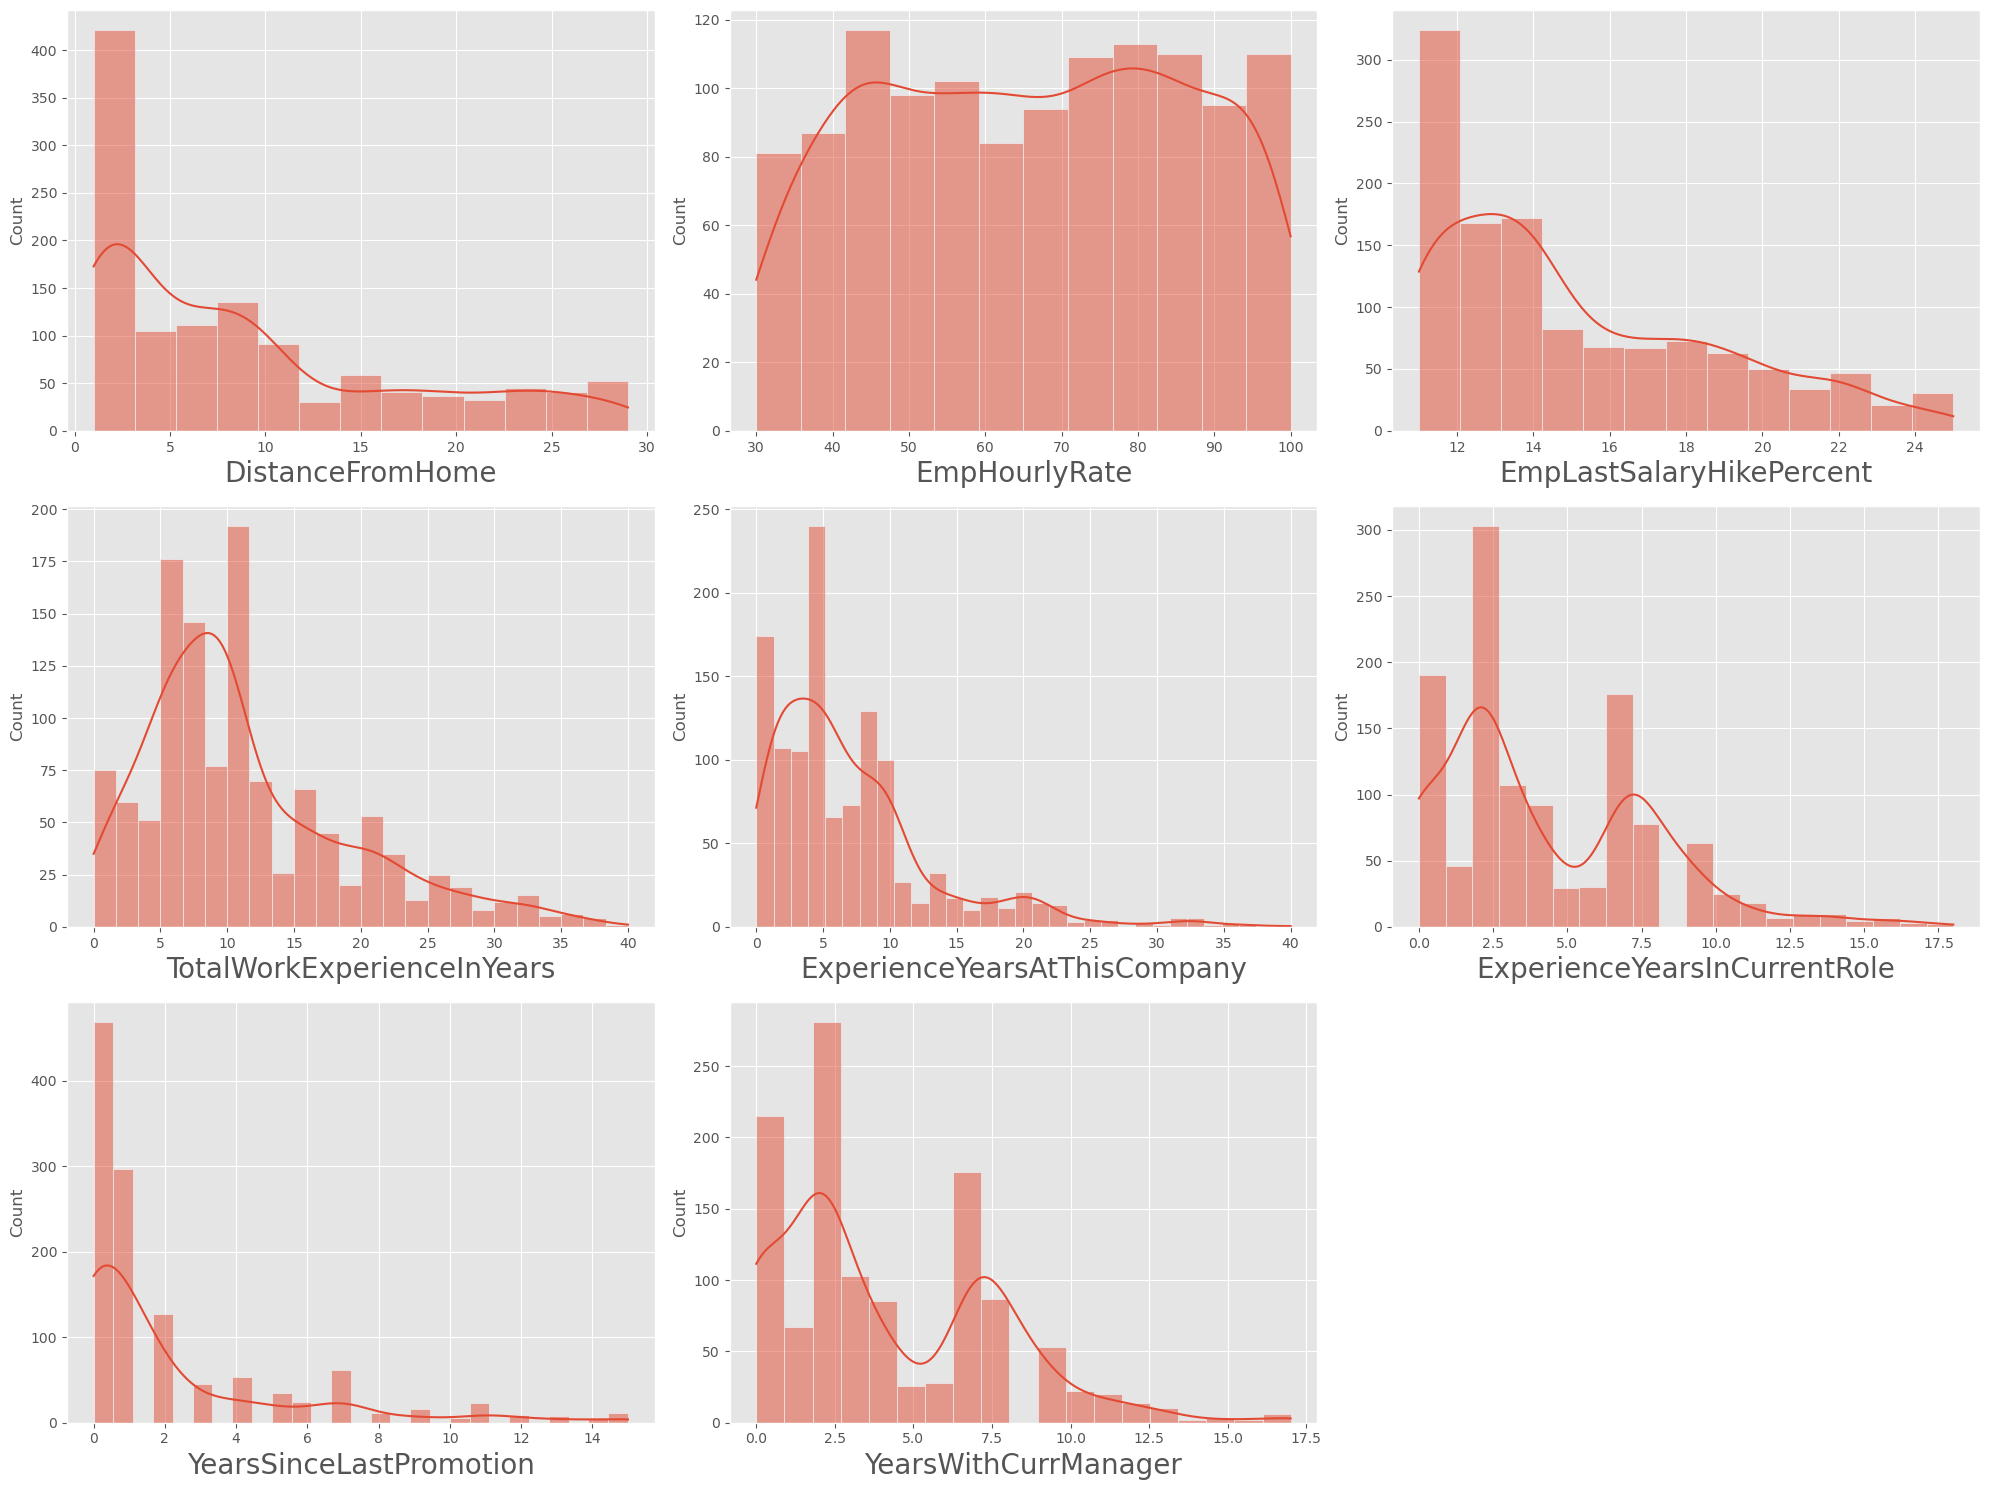

In [22]:
continuous = df[['DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
                   'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,15)) # defining canvas size
plotno = 1 # counter

for column in continuous: # iteration of columns / accessing the columns from continuous 
    if plotno<=8:    # set the limit
        plt.subplot(3,3,plotno) # plotting 8 graphs (3-rows,3-columns), plotnumber is for count
        sns.histplot(x=continuous[column], kde=True) # Using histplot with Kernel Density Estimation
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

### CHECK THE SKEWNESS
Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

In [23]:
print('1.Distance From Home Feature Skewness:',df.DistanceFromHome.skew())
print('2.Employee Hourly Rate Feature Skewness:',df.EmpHourlyRate.skew())
print('3.Employee Last Salary Hike Percent Feature Skewness:',df.EmpLastSalaryHikePercent.skew())
print('4.Total Work Experiance In Year Feature Skewness:',df.TotalWorkExperienceInYears.skew())
print('5.Experiance Year At This Company Feature Skewness:',df.ExperienceYearsAtThisCompany.skew())
print('6.Experiance Year In Current Role Feature Skewness:',df.ExperienceYearsInCurrentRole.skew())
print('7.Year Since Last Promotion Feature Skewness:',df.YearsSinceLastPromotion.skew())
print('8.Years With Current Manager Feature Skewness:',df.YearsWithCurrManager.skew())

1.Distance From Home Feature Skewness: 0.9629561160828001
2.Employee Hourly Rate Feature Skewness: -0.035164888157941436
3.Employee Last Salary Hike Percent Feature Skewness: 0.8086536332261228
4.Total Work Experiance In Year Feature Skewness: 1.0868618597364565
5.Experiance Year At This Company Feature Skewness: 1.789054979919473
6.Experiance Year In Current Role Feature Skewness: 0.8881586703270758
7.Year Since Last Promotion Feature Skewness: 1.9749315589155791
8.Years With Current Manager Feature Skewness: 0.8131582957766446


- From above all Feature skewness only one feature Year Since Last Promotion have skew so we need to do feature transformation in data preprocessing

### CHECK THE KURTOSIS
kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.

In [24]:
print('1.Distance From Home Feature kurtosis:',df.DistanceFromHome.kurtosis())
print('2.Employee Hourly Rate Feature kurtosis:',df.EmpHourlyRate.kurtosis())
print('3.Employee Last Salary Hike Percent Feature kurtosis:',df.EmpLastSalaryHikePercent.kurtosis())
print('4.Total Work Experiance In Year Feature kurtosis:',df.TotalWorkExperienceInYears.kurtosis())
print('5.Experiance Year At This Company Feature kurtosis:',df.ExperienceYearsAtThisCompany.kurtosis())
print('6.Experiance Year In Current Role Feature kurtosis:',df.ExperienceYearsInCurrentRole.kurtosis())
print('7.Year Since Last Promotion Feature kurtosis:',df.YearsSinceLastPromotion.kurtosis())
print('8.Years With Current Manager Feature kurtosis:',df.YearsWithCurrManager.kurtosis())

1.Distance From Home Feature kurtosis: -0.24201677636189256
2.Employee Hourly Rate Feature kurtosis: -1.1868905128360532
3.Employee Last Salary Hike Percent Feature kurtosis: -0.29974077544117517
4.Total Work Experiance In Year Feature kurtosis: 0.8056333333819827
5.Experiance Year At This Company Feature kurtosis: 4.057959404441291
6.Experiance Year In Current Role Feature kurtosis: 0.4380286874251209
7.Year Since Last Promotion Feature kurtosis: 3.5390800793468817
8.Years With Current Manager Feature kurtosis: 0.14820164456972984


From above all Feature kurtosis only high in two features " experiance year at this company & Year Since Last Promotion"have kutosis so we need to do feature transformation in data preprocessing

### FEATURE TRANSFORMATION

**Q-Q Plot:** Q–Q plot is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other.



In [25]:
import pylab
import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

# define a function to plot a Q-Q plot
def plot_df(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

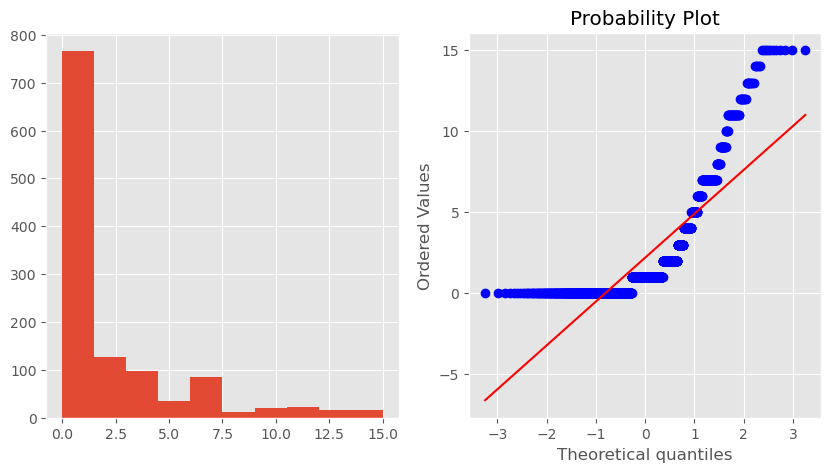

In [26]:
plot_df(df,'YearsSinceLastPromotion')

In [27]:
df['square_YearsSinceLastPromotion'] = df.YearsSinceLastPromotion**(1/2)

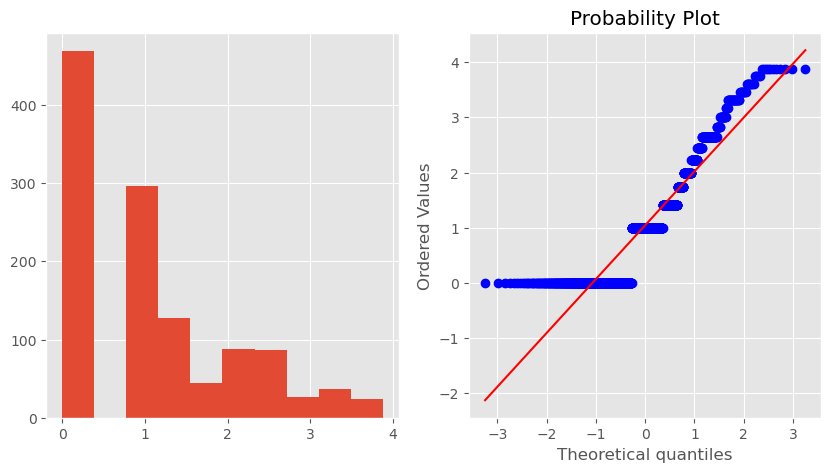

In [28]:
plot_df(df,'square_YearsSinceLastPromotion')

Now some points are close to the line.


# CONVERT CATEGORICAL TO NUMERICAL

In [29]:
# Get all categorical feature list
list(df.select_dtypes('object'))

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

**GENDER**

In [30]:
#Gender
# Get value counts of gender
df.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [31]:
# Use mannual encoding to map the labels
df.Gender = df.Gender.map({'Male':1,'Female':0})

#Mannual Encoding: Mannual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.

**EDUCATION BACKGROUND**

In [32]:
#Eduation Background 
# Get value counts of Education Background
df.EducationBackground.value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [33]:
# Use frequency encoding, is an encoding technique to transform an original categorical variable to a numerical variable by considering the frequency distribution of the data getting value counts
df.loc[df['EducationBackground']=='Life Sciences','EducationBackground']=5
df.loc[df['EducationBackground']=='Medical','EducationBackground']=4
df.loc[df['EducationBackground']=='Marketing','EducationBackground']=3
df.loc[df['EducationBackground']=='Technical Degree','EducationBackground']=2
df.loc[df['EducationBackground']=='Other','EducationBackground']=1
df.loc[df['EducationBackground']=='Human Resources','EducationBackground']=0

In [34]:
# Checking conversion happen or not
df.EducationBackground.value_counts()

5    492
4    384
3    137
2    100
1     66
0     21
Name: EducationBackground, dtype: int64

**MARITAL STATUS**

In [35]:
# Get the value counts of marital status
df.MaritalStatus.value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [36]:
# Use mannual encoding
df.MaritalStatus = df.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [37]:
# Check conversion happen or not
df.MaritalStatus.value_counts()

2    548
1    384
0    268
Name: MaritalStatus, dtype: int64

**EMPLOYEE DEPARTMENT** 


In [38]:
# Get the value counts of employee department 
df.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [39]:
# Use Frequency encoding
df.loc[df['EmpDepartment']=='Sales','EmpDepartment']=5
df.loc[df['EmpDepartment']=='Development','EmpDepartment']=4
df.loc[df['EmpDepartment']=='Research & Development','EmpDepartment']=3
df.loc[df['EmpDepartment']=='Human Resources','EmpDepartment']=2
df.loc[df['EmpDepartment']=='Finance','EmpDepartment']=1
df.loc[df['EmpDepartment']=='Data Science','EmpDepartment']=0

In [40]:
# Check conversion happen or not
df.EmpDepartment.value_counts()

5    373
4    361
3    343
2     54
1     49
0     20
Name: EmpDepartment, dtype: int64

**EMPLOYEE JOB ROLE**

In [41]:
# Getting the value counts of EmpJobRole
df.EmpJobRole.value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [42]:
# Use frequency encoding because feature contain a lots of label
df.loc[df['EmpJobRole']=='Sales Executive','EmpJobRole']=18
df.loc[df['EmpJobRole']=='Developer','EmpJobRole']=17
df.loc[df['EmpJobRole']=='Manager R&D','EmpJobRole']=16
df.loc[df['EmpJobRole']=='Research Scientist','EmpJobRole']=15
df.loc[df['EmpJobRole']=='Sales Representative','EmpJobRole']=14
df.loc[df['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
df.loc[df['EmpJobRole']=='Senior Developer','EmpJobRole']=12
df.loc[df['EmpJobRole']=='Manager','EmpJobRole']=11
df.loc[df['EmpJobRole']=='Finance Manager','EmpJobRole']=10
df.loc[df['EmpJobRole']=='Human Resources','EmpJobRole']=9
df.loc[df['EmpJobRole']=='Technical Lead','EmpJobRole']=8
df.loc[df['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
df.loc[df['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
df.loc[df['EmpJobRole']=='Data Scientist','EmpJobRole']=5
df.loc[df['EmpJobRole']=='Research Director','EmpJobRole']=4
df.loc[df['EmpJobRole']=='Business Analyst','EmpJobRole']=3
df.loc[df['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
df.loc[df['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
df.loc[df['EmpJobRole']=='Technical Architect','EmpJobRole']=0

In [43]:
# Check conversion happen or not
df.EmpJobRole.value_counts()

18    270
17    236
16     94
15     77
14     69
13     64
12     52
11     51
10     49
9      45
8      38
7      33
6      33
5      20
4      19
3      16
2      15
1      12
0       7
Name: EmpJobRole, dtype: int64

**BUSINESS TRAVEL FREQUENCY**

In [44]:
# Get the value count of buisness travel frequency
df.BusinessTravelFrequency.value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [45]:
# Use mannual encoding Because feature contain minimum label
df.BusinessTravelFrequency = df.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})

In [46]:
# Check conversion happen or not
df.BusinessTravelFrequency.value_counts()

2    846
1    222
0    132
Name: BusinessTravelFrequency, dtype: int64

**OVERTIME**

In [47]:
# Get the value count of Overtime
df.OverTime.value_counts()

No     847
Yes    353
Name: OverTime, dtype: int64

In [48]:
# Use mannual Encoding
df.OverTime = df.OverTime.map({'No':1,'Yes':0})

In [49]:
# Check conversion happen or not
df.OverTime.value_counts()

1    847
0    353
Name: OverTime, dtype: int64

**ATTRITION**

In [50]:
# Get the value counts of Attrition
df.Attrition.value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [51]:
# Use Mannual encoding because feature contain less no of label
df.Attrition = df.Attrition.map({'No':1,'Yes':0})

In [52]:
# Check conversion happen or not
df.Attrition.value_counts()

1    1022
0     178
Name: Attrition, dtype: int64

In [53]:
# Check all data features 
df.head()

EmpNumber  Age  Gender EducationBackground  MaritalStatus EmpDepartment  \
0  E1001000   32       1                   3              1             5   
1  E1001006   47       1                   3              1             5   
2  E1001007   40       1                   5              2             5   
3  E1001009   41       1                   0              0             2   
4  E1001010   60       1                   3              1             5   

  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0         18                        2                10                  3   
1         18                        2                14                  4   
2         18                        1                 5                  4   
3         11                        2                10                  4   
4         18                        2                16                  4   

   ...  TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0  ...                          10                      2                   2   
1  ...                          20                      2                   3   
2  ...                          20                      2                   3   
3  ...                          23                      2                   2   
4  ...                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
0                        0                     8          1   
1                        1                     7          1   
2                        1                    12          1   
3                       12                     6          1   
4                        2                     2          1   

   PerformanceRating  square_YearsSinceLastPromotion  
0                  3                        0.000000  
1                  3                        1.000000  
2                  4                        1.000000  
3                  3                        3.464102  
4                  3                        1.414214  

[5 rows x 29 columns]

# CHECK OUTLIERS AND IMPUTE OUTLIERS

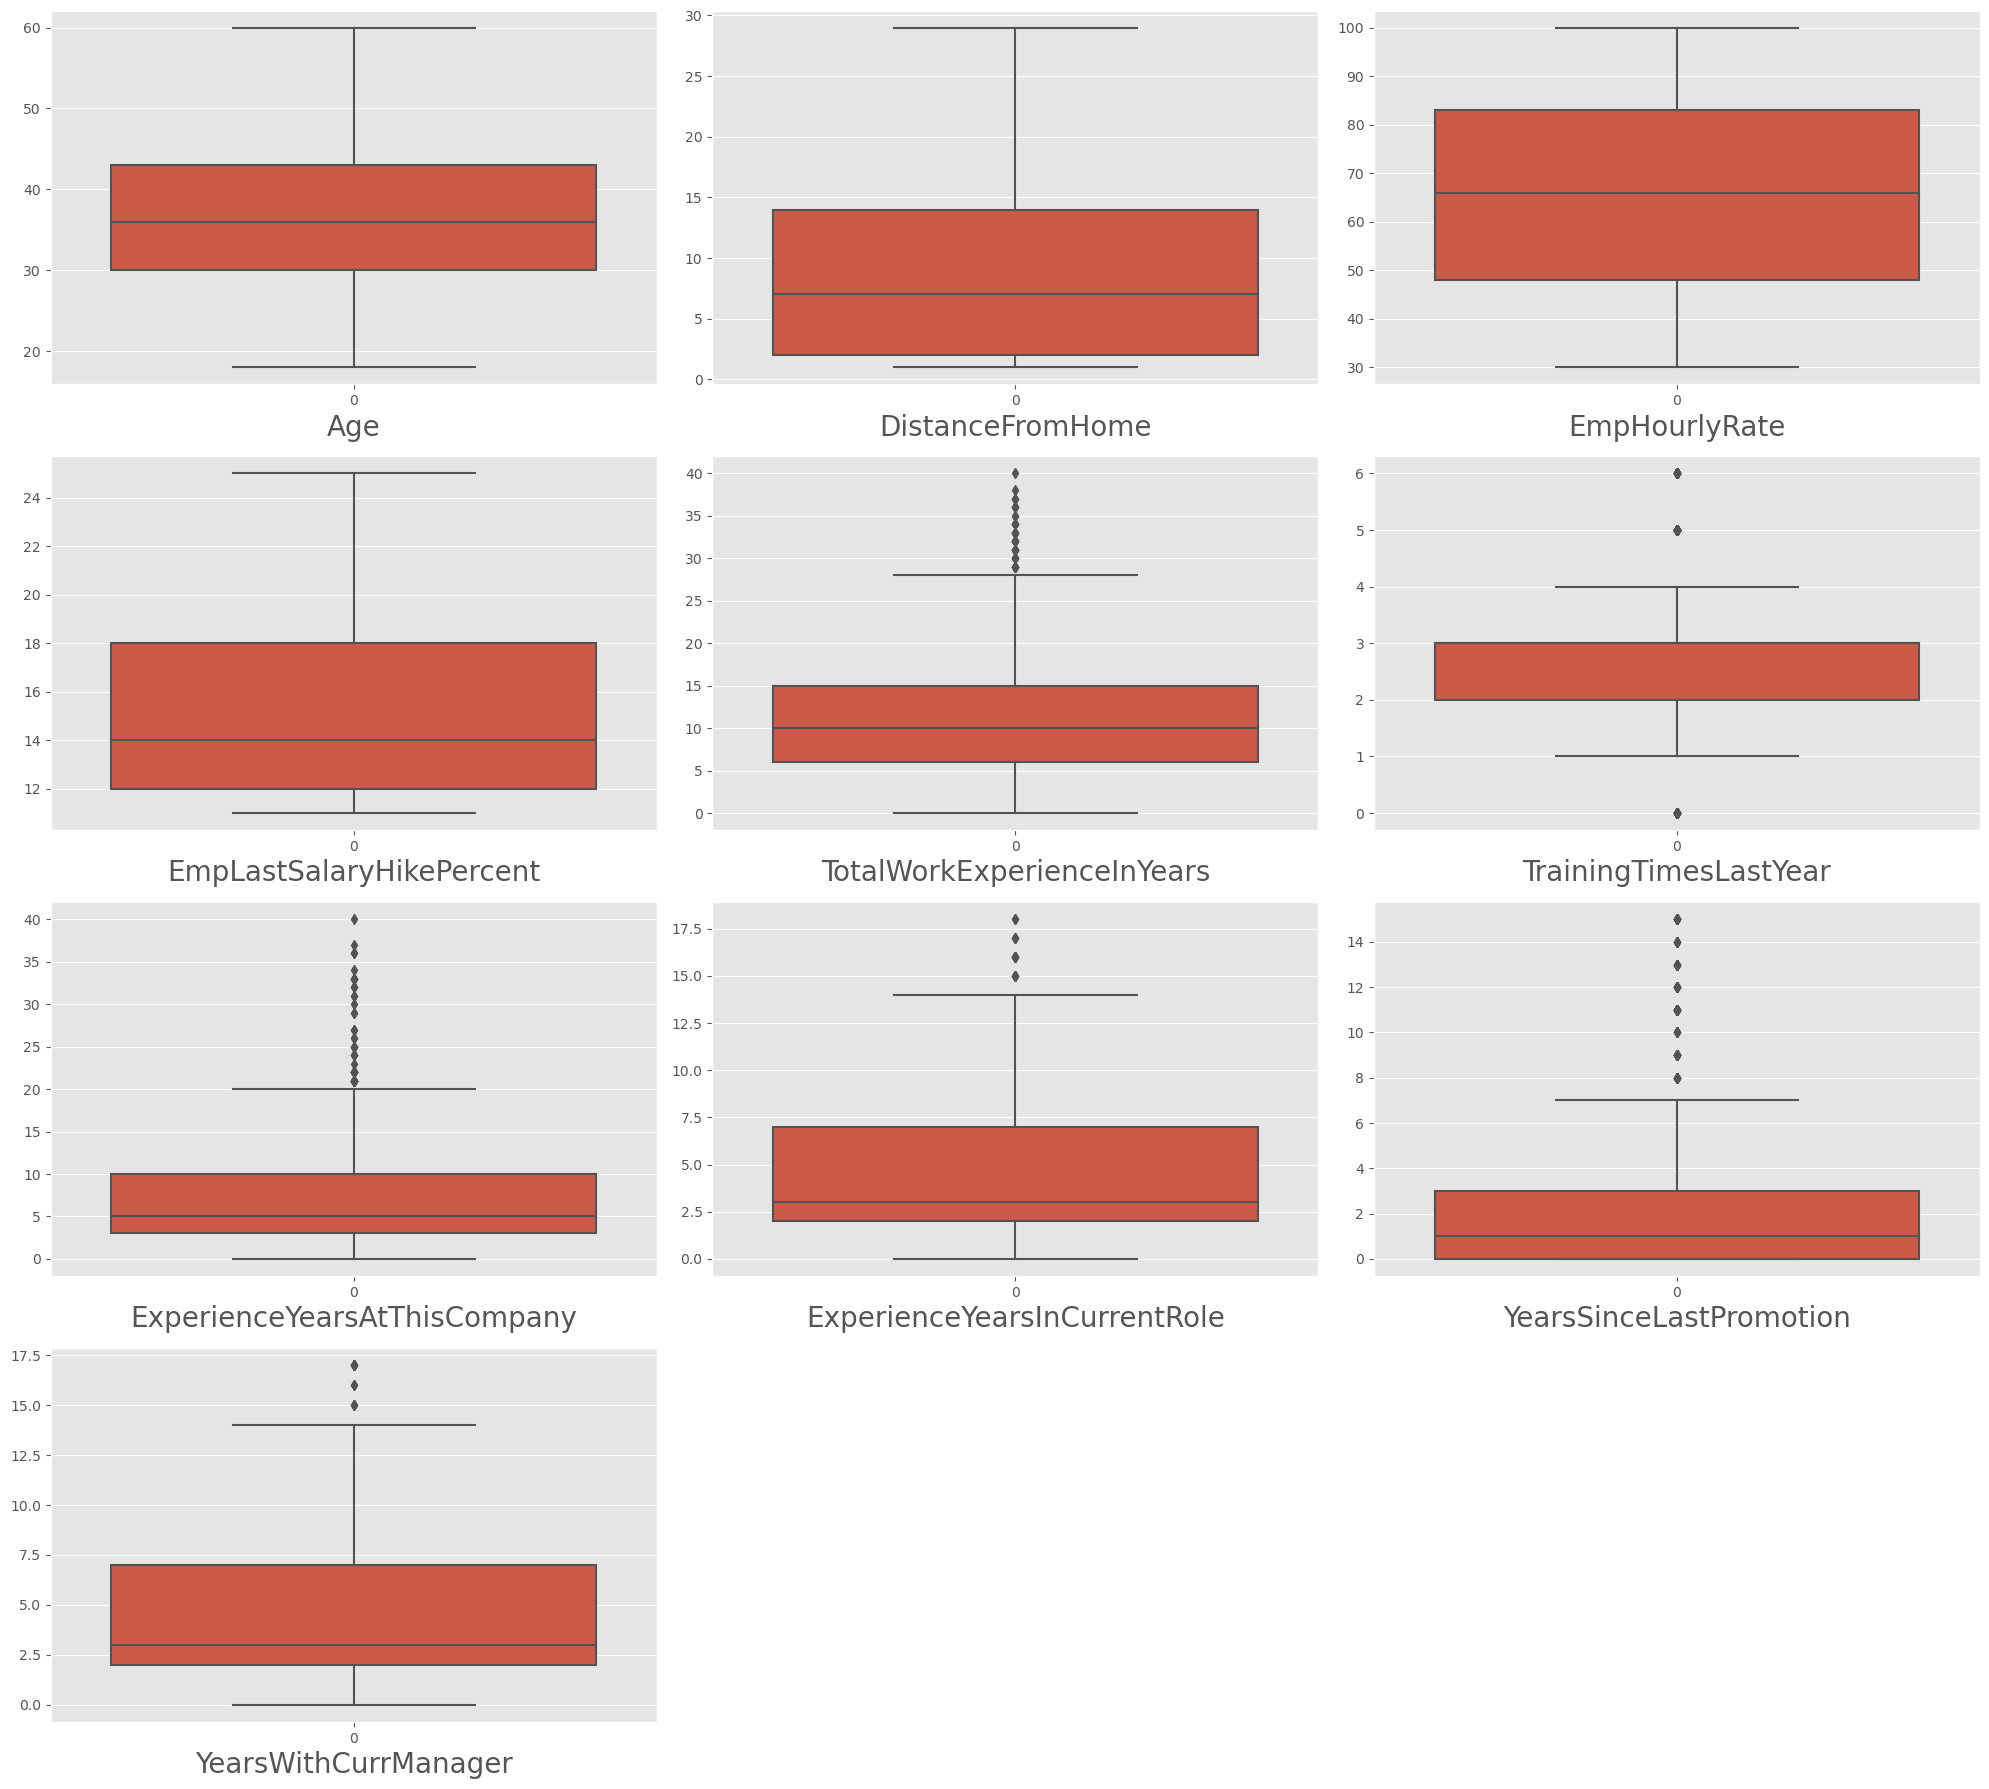

In [54]:
out = df[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

Here we are use inter quatile range to impute the outlier, becuase data is not normally distributed.

**IQR = Inter Quatile Range**

IQR stand for the interquatile range, When a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean. which is the difference between the first and third quartiles

### Addressing the outliers 

In [55]:
#Total Work Experiance in year
# Use iqr range because some skewed in data
iqr = stats.iqr(df['TotalWorkExperienceInYears'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = df['TotalWorkExperienceInYears'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [56]:
# Impute outlier
df.loc[df['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=df['TotalWorkExperienceInYears'].median()

In [57]:
# filtering data after imputation
df.loc[df['TotalWorkExperienceInYears'] > max_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating, square_YearsSinceLastPromotion]
Index: []

[0 rows x 29 columns]

In [58]:
#Training Times Last Year
iqr = stats.iqr(df['TrainingTimesLastYear'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['TrainingTimesLastYear'].quantile(0.25)
Q3 = df['TrainingTimesLastYear'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [59]:
# Impute outlier in max & minmum limit
df.loc[df['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=df['TrainingTimesLastYear'].median()
df.loc[df['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=df['TrainingTimesLastYear'].median()

In [60]:
# Filtering the min limit
df.loc[df['TrainingTimesLastYear'] < min_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating, square_YearsSinceLastPromotion]
Index: []

[0 rows x 29 columns]

In [61]:
# Filtering the max limit
df.loc[df['TrainingTimesLastYear'] > max_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating, square_YearsSinceLastPromotion]
Index: []

[0 rows x 29 columns]

In [62]:
#Experience Years At This Company
# Use iqr range because some skewed in data
iqr = stats.iqr(df['ExperienceYearsAtThisCompany'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = df['ExperienceYearsAtThisCompany'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [63]:
# Impute outlier
df.loc[df['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=df['ExperienceYearsAtThisCompany'].median()

In [64]:
# Filtering the data
df.loc[df['ExperienceYearsAtThisCompany'] > max_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating, square_YearsSinceLastPromotion]
Index: []

[0 rows x 29 columns]

In [65]:
#Experience Years In Current Role
# Use iqr range because some skewed in data
iqr = stats.iqr(df['ExperienceYearsInCurrentRole'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = df['ExperienceYearsInCurrentRole'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [66]:
# Impute outlier
df.loc[df['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole']=df['ExperienceYearsInCurrentRole'].median()

In [67]:
# Filtering the data
df.loc[df['ExperienceYearsInCurrentRole'] > max_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating, square_YearsSinceLastPromotion]
Index: []

[0 rows x 29 columns]

In [68]:
#Years Since Last Promotion
# use iqr because some skewed in data
iqr = stats.iqr(df['YearsSinceLastPromotion'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = df['YearsSinceLastPromotion'].quantile(0.25)
Q3 = df['YearsSinceLastPromotion'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [69]:
# impute outlier
df.loc[df['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=df['YearsSinceLastPromotion'].median()

In [70]:
# Filtering data
df.loc[df['YearsSinceLastPromotion'] > max_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating, square_YearsSinceLastPromotion]
Index: []

[0 rows x 29 columns]

In [71]:
#Years With Current Manager
# use iqr because some skewed in data
iqr = stats.iqr(df['YearsWithCurrManager'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = df['YearsWithCurrManager'].quantile(0.25)
Q3 = df['YearsWithCurrManager'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum limit 14.5


In [72]:
# impute outlier
df.loc[df['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=df['YearsWithCurrManager'].median()

In [73]:
# Filtering the data
df.loc[df['YearsWithCurrManager'] >max_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating, square_YearsSinceLastPromotion]
Index: []

[0 rows x 29 columns]

### CHECKING OUTLIER AFTER IMPUTATION

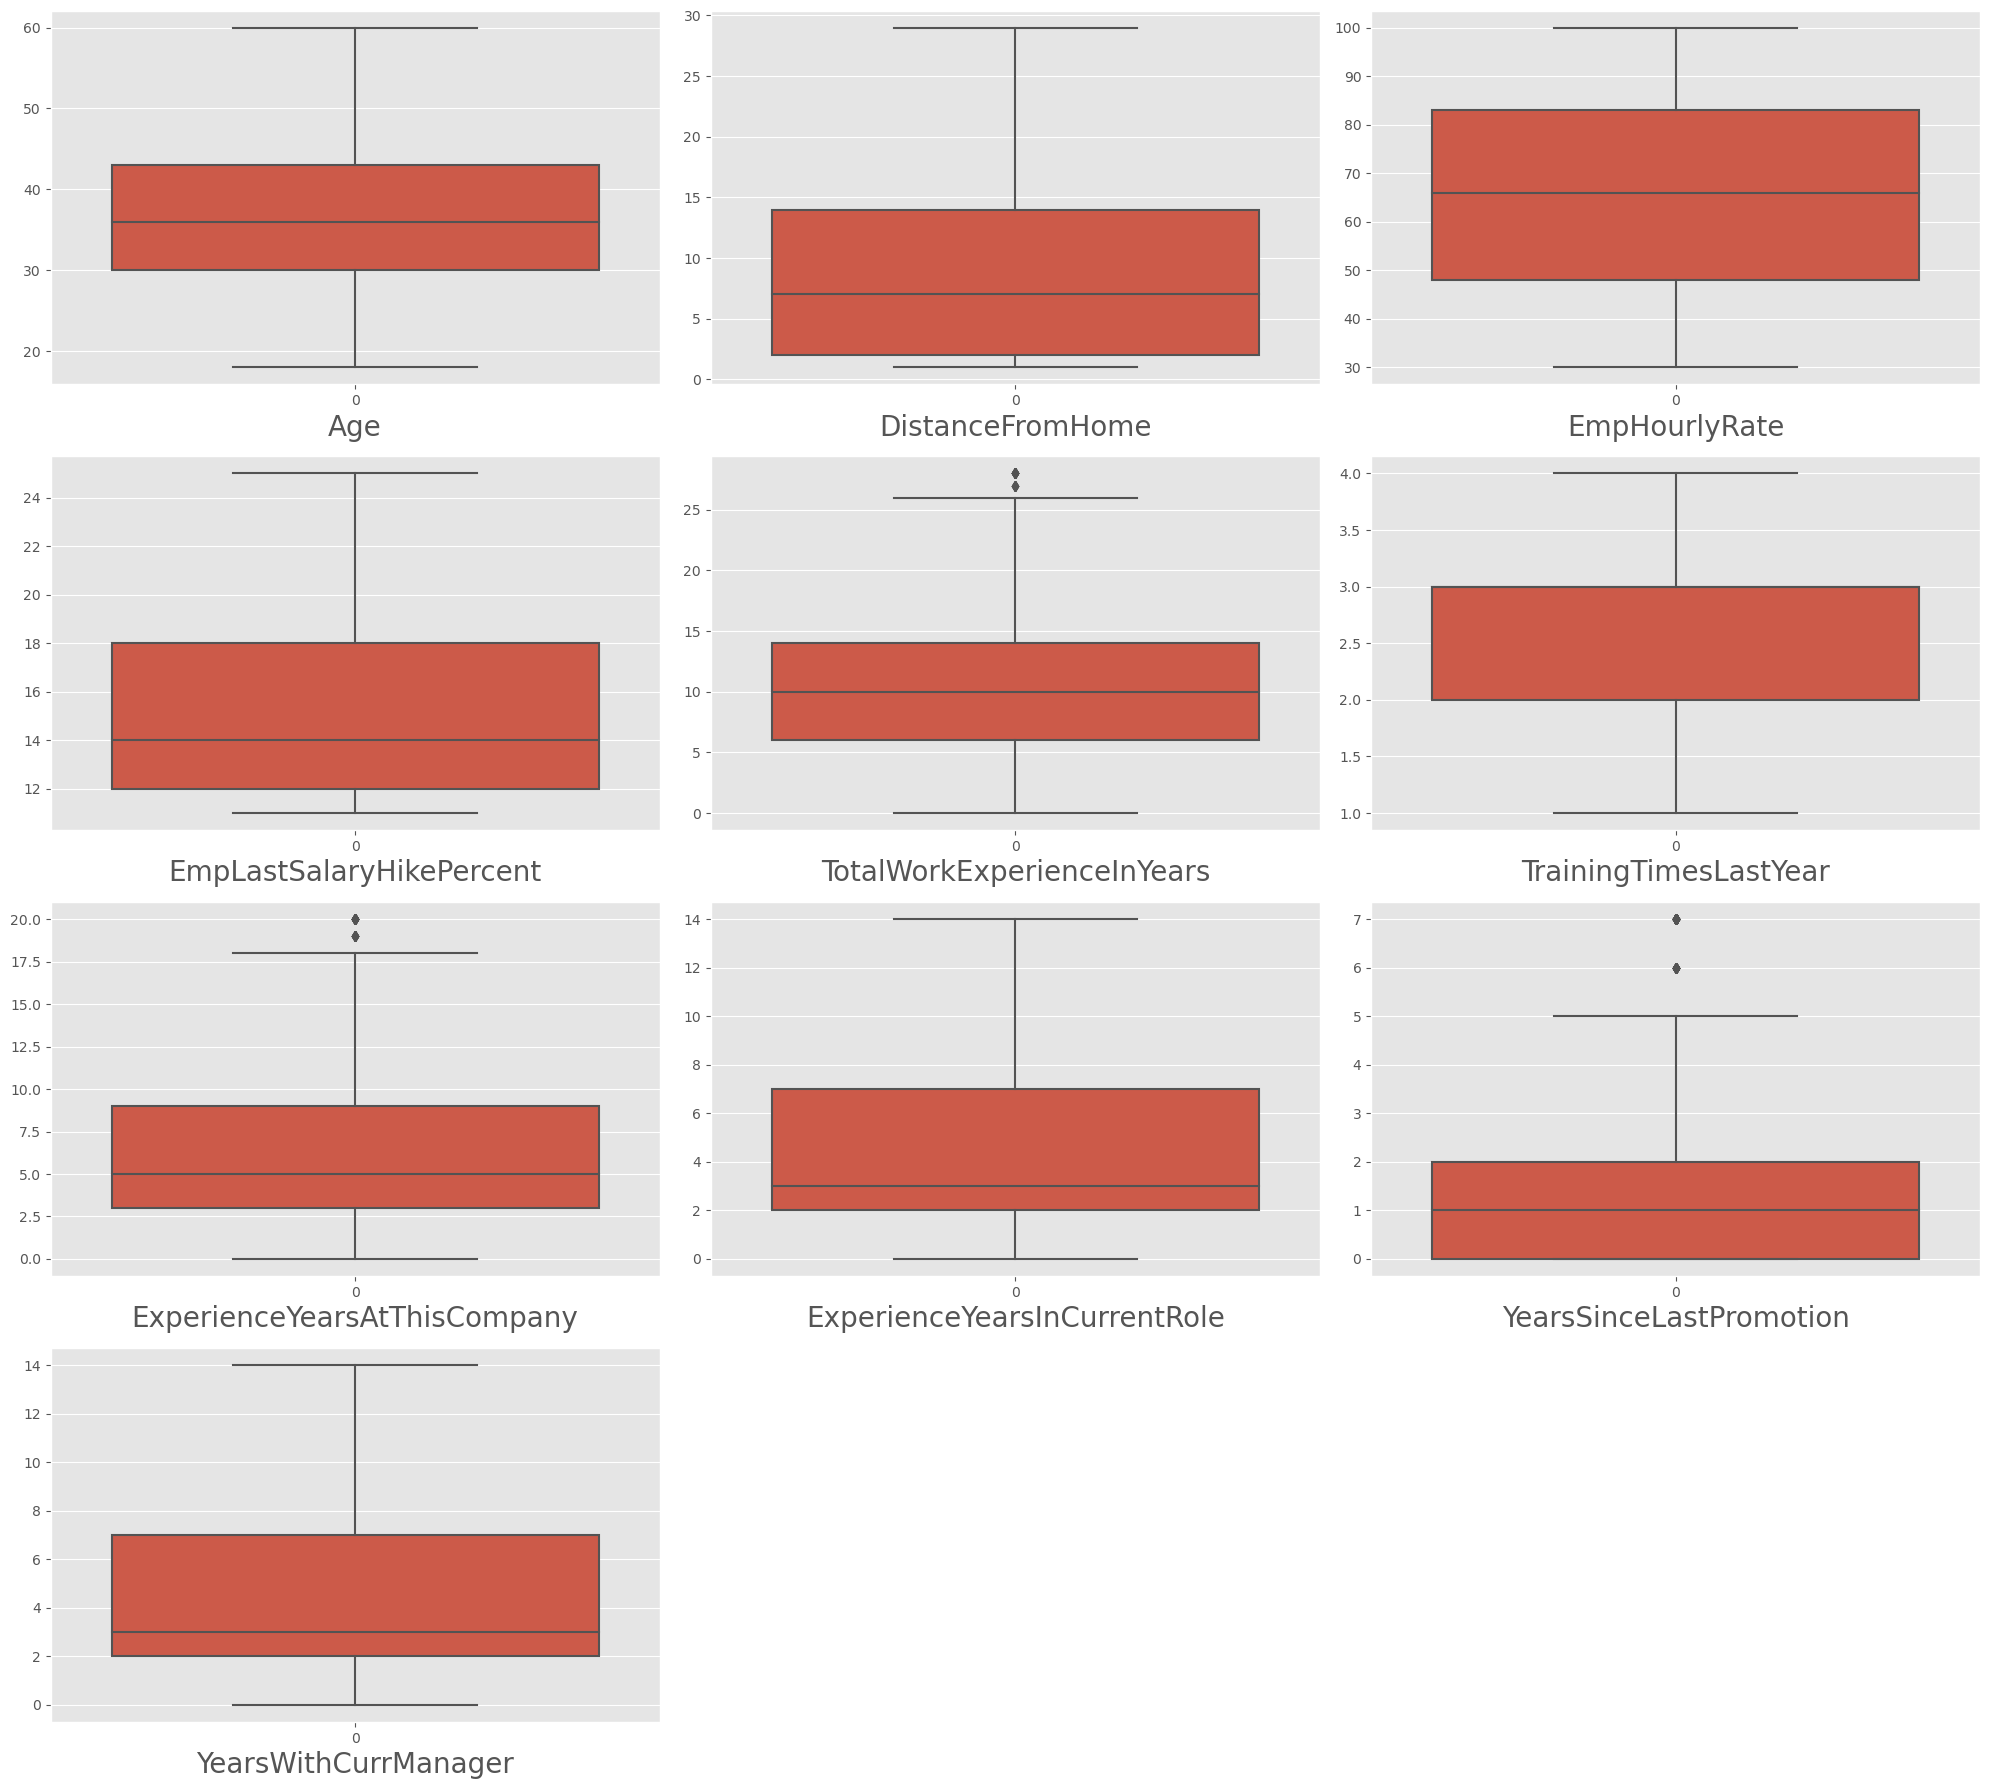

In [74]:
out = df[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

**Observation:**

Outlier impute sucessfully, but some feature box plot showing outlier, so we can not impute this outlier.

### SCALING THE DATA

Standardization is the process of scaling the feature, it assumes the feature follow normal distribution and scale the feature between mean and standard deviation, here mean is 0 and standard deviation is always 1.

In [75]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()  #Create Object

df[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'square_YearsSinceLastPromotion']]=scalar.fit_transform(df[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','square_YearsSinceLastPromotion']])

In [76]:
df.head()

EmpNumber       Age  Gender EducationBackground  MaritalStatus  \
0  E1001000 -0.541458       1                   3              1   
1  E1001006  1.109888       1                   3              1   
2  E1001007  0.339260       1                   5              2   
3  E1001009  0.449349       1                   0              0   
4  E1001010  2.541054       1                   3              1   

  EmpDepartment EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0             5         18                        2          0.102061   
1             5         18                        2          0.591464   
2             5         18                        1         -0.509693   
3             2         11                        2          0.102061   
4             5         18                        2          0.836165   

   EmpEducationLevel  ...  TotalWorkExperienceInYears  TrainingTimesLastYear  \
0                  3  ...                   -0.058535              -0.879579   
1                  4  ...                    1.512870              -0.879579   
2                  4  ...                    1.512870              -0.879579   
3                  4  ...                    1.984292              -0.879579   
4                  4  ...                   -0.058535              -2.303999   

   EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                   2                      0.868276   
1                   3                      0.200371   
2                   3                      2.649355   
3                   2                     -0.244898   
4                   3                     -0.912803   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                      0.864098                        0   
1                      0.864098                        1   
2                      2.661702                        1   
3                      0.564498                        1   
4                     -0.633905                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  \
0              1.202103          1                  3   
1              0.902825          1                  3   
2              2.399219          1                  4   
3              0.603546          1                  3   
4             -0.593570          1                  3   

   square_YearsSinceLastPromotion  
0                       -0.995673  
1                       -0.043007  
2                       -0.043007  
3                        2.304459  
4                        0.351600  

[5 rows x 29 columns]

# FEATURE SELECTION

In [77]:
# Dropping employee number because this is a constant column as well as drop Years Since Last Promotion because we create a new feaure using square root tr
df.drop(['EmpNumber','YearsSinceLastPromotion'],axis=1,inplace=True)

In [78]:
df

Age  Gender EducationBackground  MaritalStatus EmpDepartment  \
0    -0.541458       1                   3              1             5   
1     1.109888       1                   3              1             5   
2     0.339260       1                   5              2             5   
3     0.449349       1                   0              0             2   
4     2.541054       1                   3              1             5   
...        ...     ...                 ...            ...           ...   
1195 -1.091906       0                   4              0             5   
1196  0.008991       1                   5              1             4   
1197  1.440157       1                   4              2             4   
1198 -0.321278       0                   4              1             0   
1199 -1.422176       0                   5              1             5   

     EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0            18                        2          0.102061                  3   
1            18                        2          0.591464                  4   
2            18                        1         -0.509693                  4   
3            11                        2          0.102061                  4   
4            18                        2          0.836165                  4   
...         ...                      ...               ...                ...   
1195         18                        1         -0.754394                  1   
1196         12                        2          0.102061                  2   
1197         12                        2          2.304373                  1   
1198          5                        2         -0.020290                  3   
1199         18                        2         -0.754394                  2   

      EmpEnvironmentSatisfaction  ...  EmpRelationshipSatisfaction  \
0                              4  ...                            4   
1                              4  ...                            4   
2                              4  ...                            3   
3                              2  ...                            2   
4                              1  ...                            4   
...                          ...  ...                          ...   
1195                           4  ...                            2   
1196                           4  ...                            1   
1197                           4  ...                            3   
1198                           4  ...                            2   
1199                           1  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                      -0.058535              -0.879579                   2   
1                       1.512870              -0.879579                   3   
2                       1.512870              -0.879579                   3   
3                       1.984292              -0.879579                   2   
4                      -0.058535              -2.303999                   3   
...                          ...                    ...                 ...   
1195                   -0.687097               0.544841                   3   
1196                   -1.001378              -0.879579                   3   
1197                    1.512870               0.544841                   3   
1198                   -0.215675               0.544841                   4   
1199                   -1.001378               0.544841                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                         0.868276                      0.864098   
1                         0.200371                      0.864098   
2                         2.649355                      2.661702   
3                        -0.244898                      0.564498   
4      

## Check for multicollinearity

### Scatter matrix

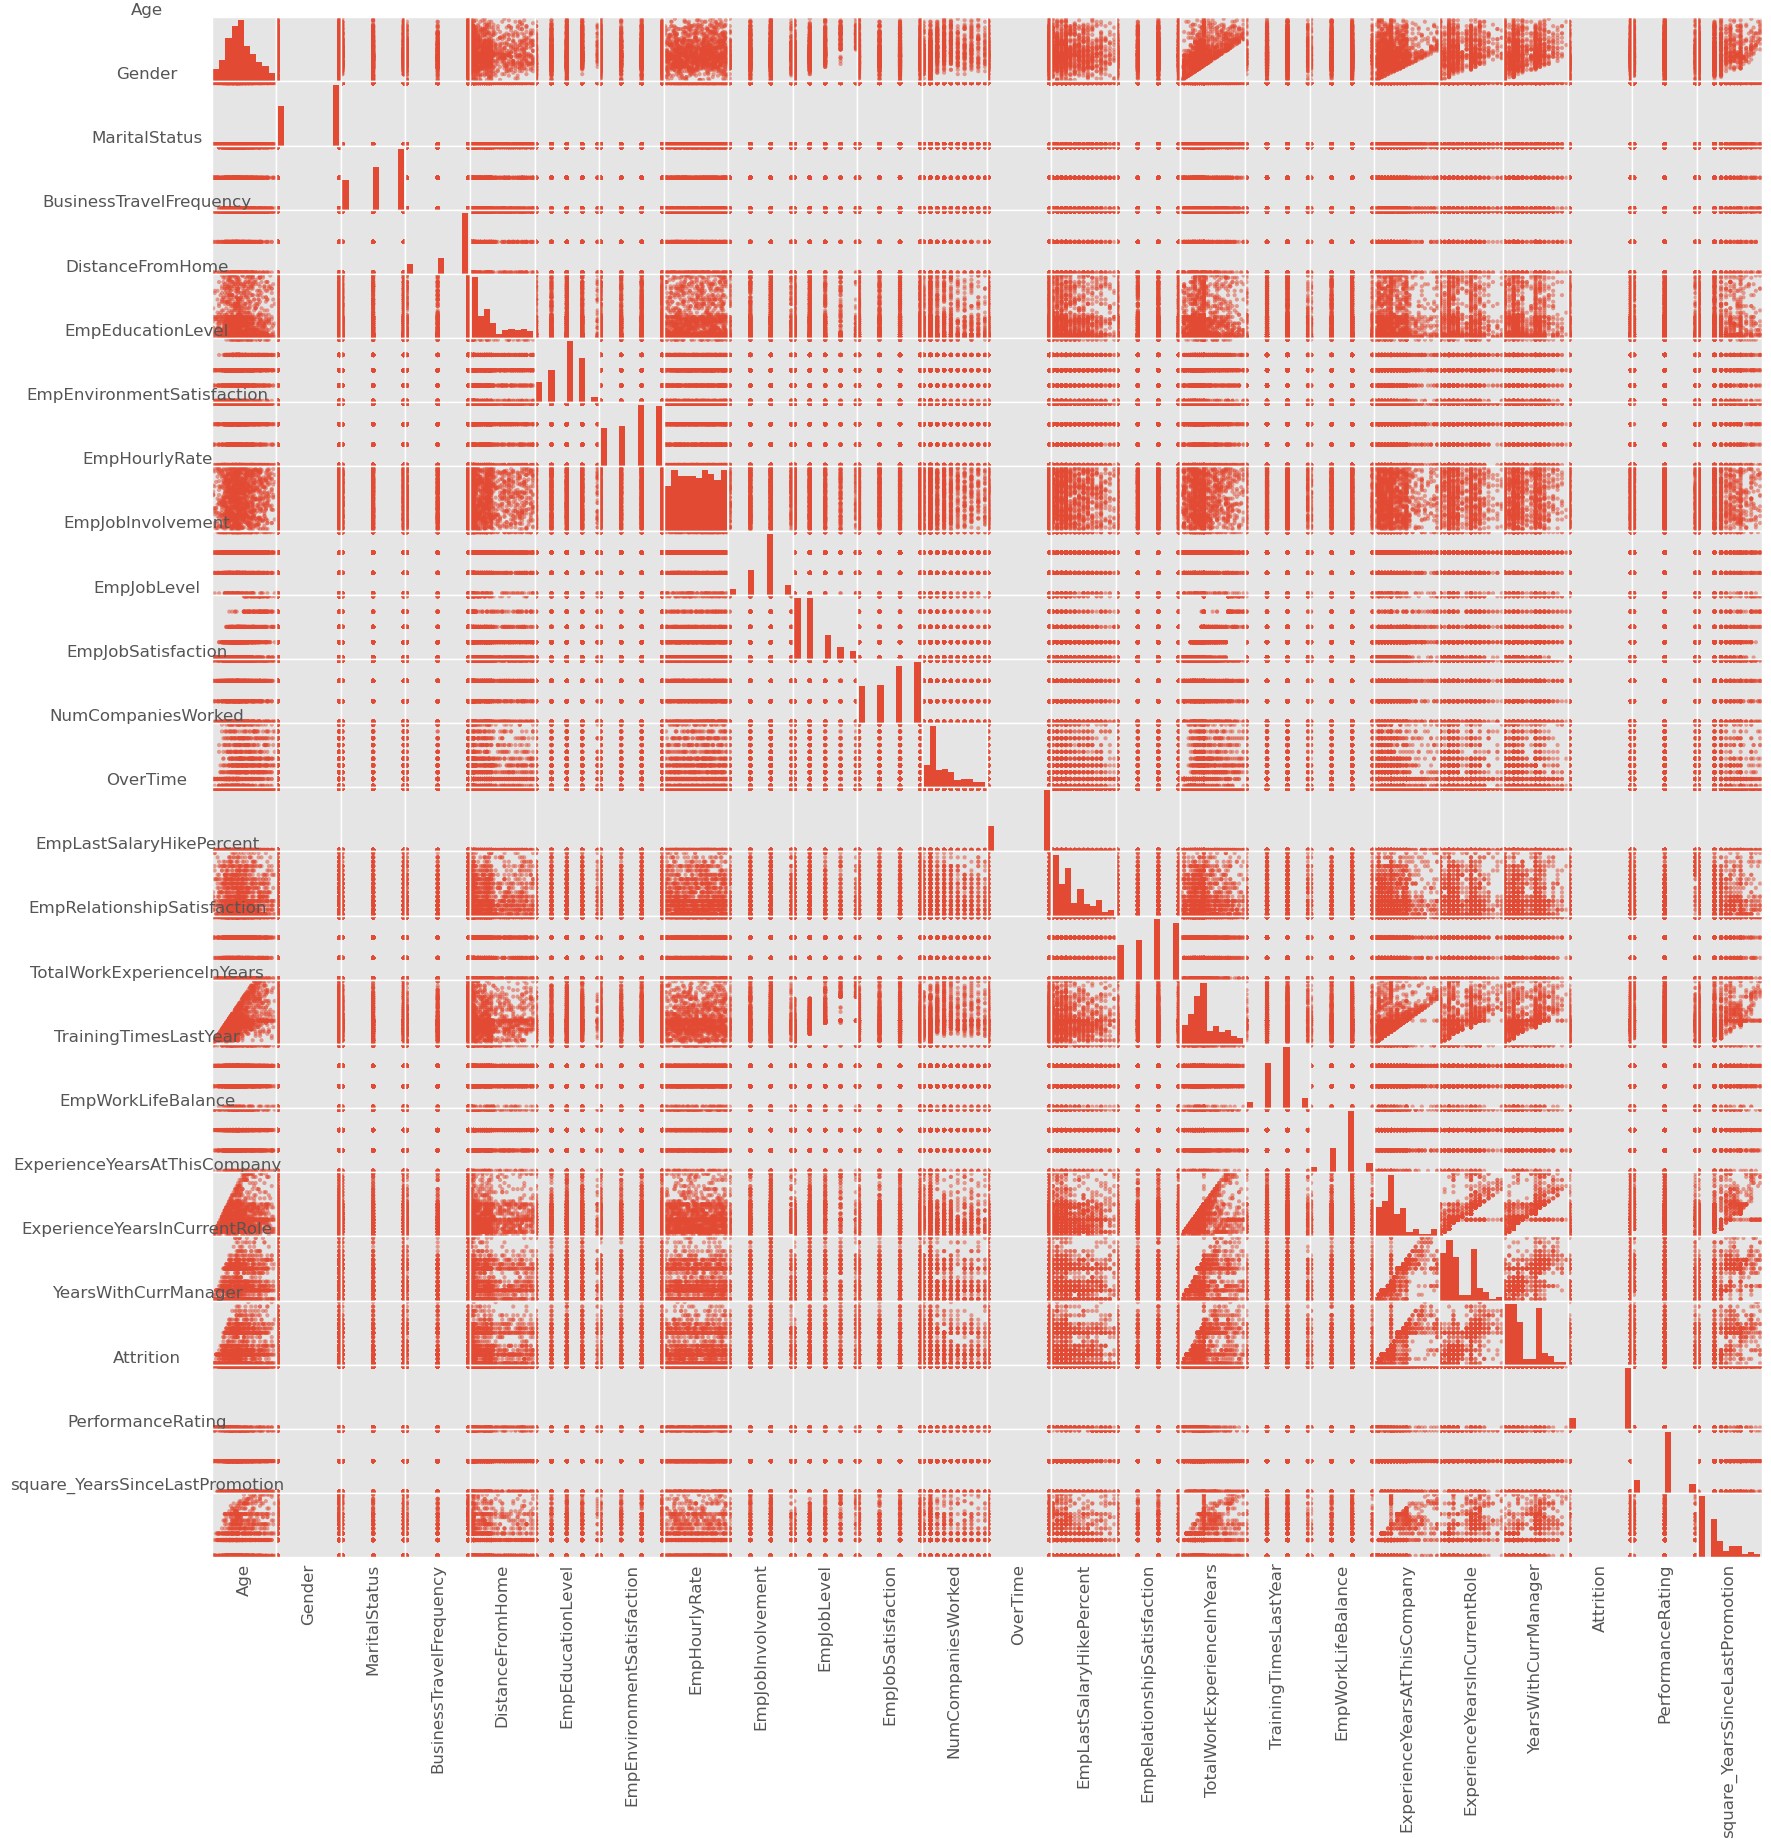

In [79]:
sm = pd.plotting.scatter_matrix(df, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,1) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

### Correlation matrix

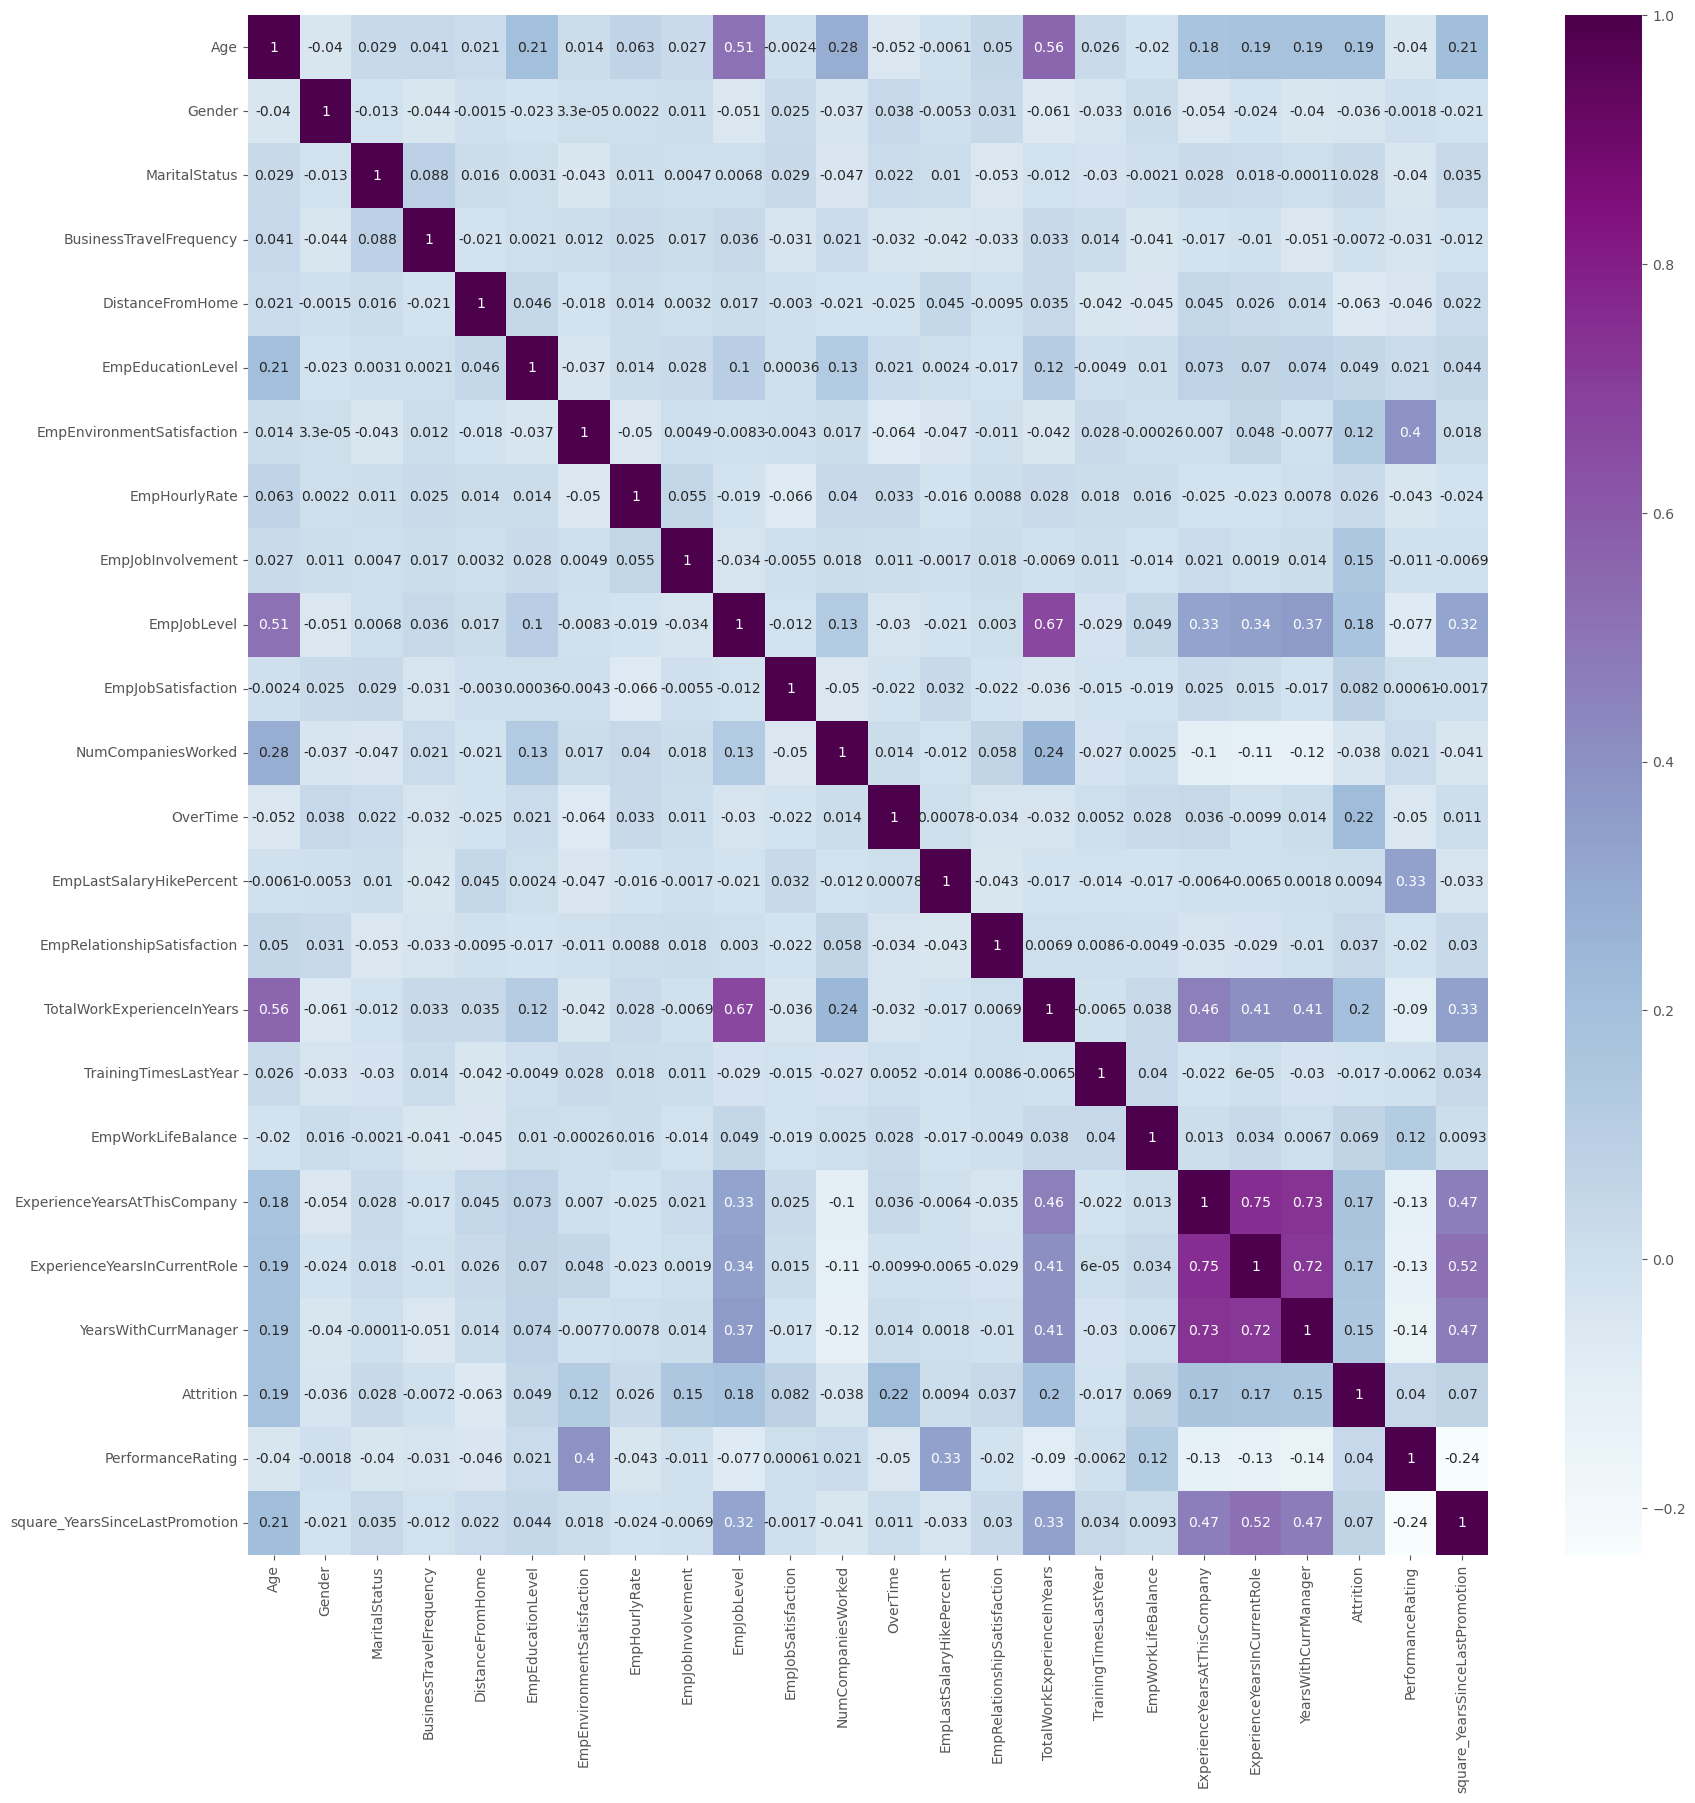

In [80]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='BuPu')
plt.show()

- From above scatter matrix and heatmap scale we are clearly seen the their is no highly correlated feature in data
- But we confirm with the help of simple code


In [81]:
df1 = df.corr(numeric_only=True).abs().stack().reset_index().sort_values(0, ascending=False)


df1['pairs'] = list(zip(df1.level_0, df1.level_1))

df1.set_index(['pairs'], inplace = True)

df1.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df1.columns = ['cc']

df1.drop_duplicates(inplace=True)

df1[(df1.cc>.75) & (df1.cc<1)]

Empty DataFrame
Columns: [cc]
Index: []

Now we confirm their is no highly correlated feature is present.

In [82]:
df.duplicated().sum()

0

In [83]:
#check for null values
df.isnull().sum()

Age                               0
Gender                            0
EducationBackground               0
MaritalStatus                     0
EmpDepartment                     0
EmpJobRole                        0
BusinessTravelFrequency           0
DistanceFromHome                  0
EmpEducationLevel                 0
EmpEnvironmentSatisfaction        0
EmpHourlyRate                     0
EmpJobInvolvement                 0
EmpJobLevel                       0
EmpJobSatisfaction                0
NumCompaniesWorked                0
OverTime                          0
EmpLastSalaryHikePercent          0
EmpRelationshipSatisfaction       0
TotalWorkExperienceInYears        0
TrainingTimesLastYear             0
EmpWorkLifeBalance                0
ExperienceYearsAtThisCompany      0
ExperienceYearsInCurrentRole      0
YearsWithCurrManager              0
Attrition                         0
PerformanceRating                 0
square_YearsSinceLastPromotion    0
dtype: int64

### MODEL

<font color='red' > The modeling phase involves selecting appropriate algorithms to analyze the data. This phase usually involves training and testing a model.  </font>